# Laboratory Assignment

Muhammad Naofal Nirvana - 34622

## Association Analysis on Student Performance Data

Since we already have a practical of association analysis on a market basket data, we will dive deeper on advance concept of Association Analysis with different type of data, i.e. data with categorical and continuous attributes where we can learn to handle such types. We’ll analyze relationships between student attributes (e.g., study habits, demographics, grades) to uncover patterns. This fits association analysis—think of it like “if a student studies X hours and attends class, they’re likely to score Y.” It’s categorical-heavy with some continuous elements, and it’s a practical real-world problem.

### Source of Information

Dataset: Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Theories and Materials: Tan, P.-N., Steinbach, M., Karpatne, A.,, Kumar, V. (2018). Introduction to Data Mining. Pearson. (Borrowed from campus' library)

The dataset we will be using is taken from the citation above. Information from the website:

"This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)."


This dataset tracks secondary school students in two Portuguese schools, with 33 attributes per student (395 rows total for the Math course). It’s got:
- Categorical: Gender, school, family size, parental education, activities (yes/no), etc.
- Continuous: Study time, absences, final grade (0–20).
- Mix: Some ordinal-like variables (e.g., study time in 4 levels: <2h, 2–5h, 5–10h, >10h).

Additional info about the dataset according to the readme file:

1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2. **sex** - student's sex (binary: "F" - female or "M" - male)  
3. **age** - student's age (numeric: from 15 to 22)  
4. **address** - student's home address type (binary: "U" - urban or "R" - rural)  
5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)  
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)  
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g., administrative or police), "at_home", or "other")  
10. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g., administrative or police), "at_home", or "other")  
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference, or "other")  
12. **guardian** - student's guardian (nominal: "mother", "father", or "other")  
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)  
16. **schoolsup** - extra educational support (binary: yes or no)  
17. **famsup** - family educational support (binary: yes or no)  
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19. **activities** - extra-curricular activities (binary: yes or no)  
20. **nursery** - attended nursery school (binary: yes or no)  
21. **higher** - wants to take higher education (binary: yes or no)  
22. **internet** - Internet access at home (binary: yes or no)  
23. **romantic** - with a romantic relationship (binary: yes or no)  
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)  
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)  
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)  
30. **absences** - number of school absences (numeric: from 0 to 93)  

These grades are related to the course subject, Math or Portuguese:  

31. **G1** - first period grade (numeric: from 0 to 20)  
32. **G2** - second period grade (numeric: from 0 to 20)  
33. **G3** - final grade (numeric: from 0 to 20, output target)  

### Problem Statement

Use association analysis to uncover patterns in student attributes (e.g., demographics, study habits, social behaviors) that are linked to academic outcomes (final grades) in a Math course. Identify actionable rules for educators to understand what factors might predict high or low performance.

### Libraries Required
- `pandas`: Data manipulation
- `numpy`: Numerical operations
- `mlxtend`: Association rule mining
- `matplotlib` & `seaborn`: Visualization
- `sklearn.preprocessing`: Discretization of continuous variables

### -------------------------------- Practical Start Line ---------------------------------------------

First thing first, we are going to import all the necessary libraries that we are going to use on this notebook. 

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

 We will be using the Math course dataset for starters since it has less data points (395 rows compared to the Portuguese course 649). Load the dataset (student-mat.csv) and see what is inside:

In [2]:
# Load Math dataset
df = pd.read_csv('student-mat.csv', sep=';')
print(f"Shape: {df.shape}")  # (395, 33)
print(df.head())

Shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

As you can see, this dataset has a combination of different datatypes. How many students are in the dataset, and how many attributes describe each student?

In [6]:
# Answer the initial question
num_students = df.shape[0]
num_attributes = df.shape[1]
print(f"Total number of students: {num_students}")
print(f"Number of attributes per student: {num_attributes}")

Total number of students: 395
Number of attributes per student: 33


### Exploratory Data Analysis

Let’s define some EDA questions to explore the dataset before jumping into association analysis. These will guide our understanding and set up the preprocessing.

To get a feel for the student performance data, we’ll answer the following questions:
1. What is the distribution of final grades (G3)? Are there any unusual patterns (e.g., many zeros)?
2. How do students split across key categorical variables like gender (`sex`) and school (`school`)?
3. Does study time (`studytime`) correlate with final grades (G3)? Are there differences in performance?
4. How are absences distributed, and do they seem to impact final grades?

Feel free to add more interesting questions!

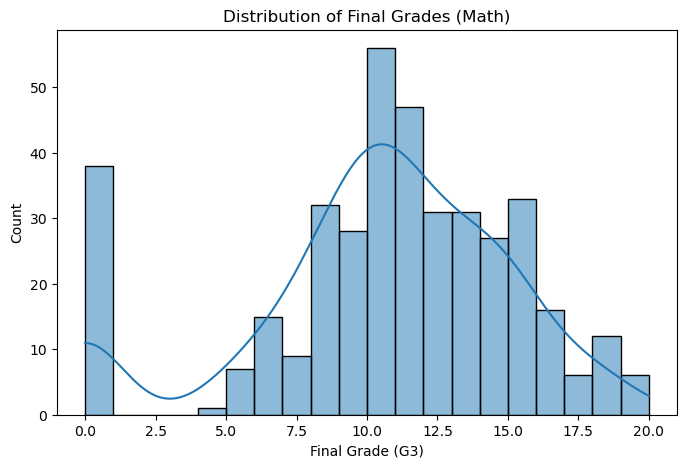

In [ ]:
# Q1: Distribution of final grades (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=20, kde=True)
plt.xlabel('Final Grade (G3)')
plt.ylabel('Count')
plt.title('Distribution of Final Grades (Math)')
plt.show()

In [57]:
df['G3'].value_counts().sort_index(ascending=True)

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

Plot Description: The histogram shows a peak on 10 and 11, with a noticeable bump at 0 (38 students). The distribution is slightly right-skewed, tapering off toward 20, and the KDE curve smooths this trend.

Insight: The zero-grade spike might indicate dropouts or incomplete data—worth noting later as a limitation. Most grades cluster 7–15, suggesting a typical range.

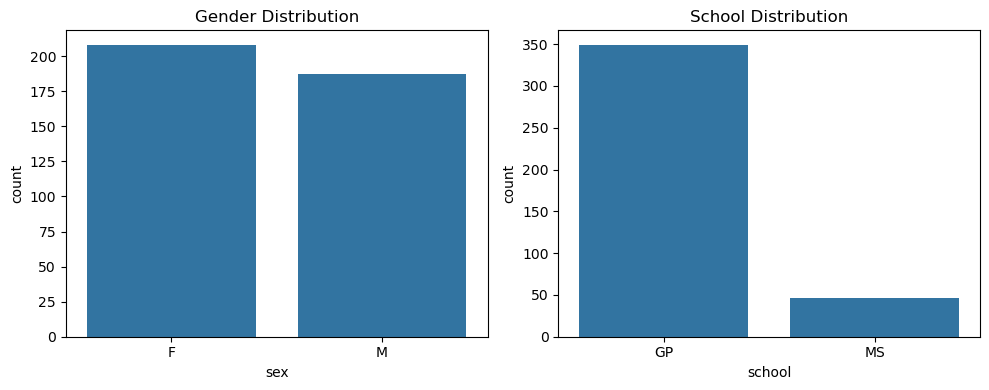

In [8]:
# Q2: Split across gender and school
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x='school', data=df)
plt.title('School Distribution')
plt.tight_layout()
plt.show()

In [13]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [14]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

Insight: Imbalanced school distribution might influence patterns—GP dominates.

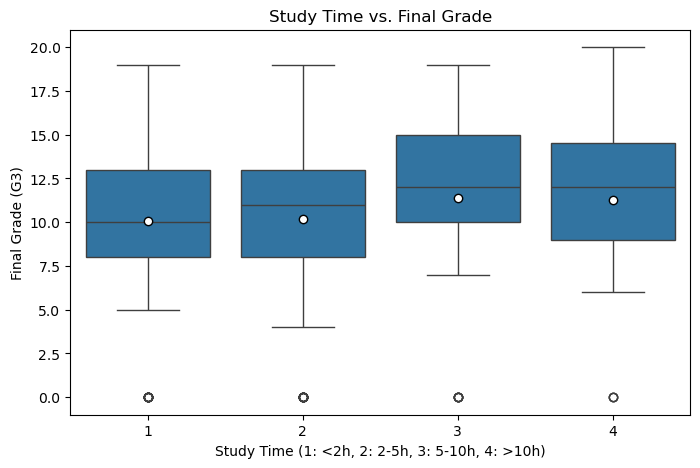

In [16]:
# Q3: Study time vs. final grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='studytime', y='G3', data=df, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
plt.xlabel('Study Time (1: <2h, 2: 2-5h, 3: 5-10h, 4: >10h)')
plt.ylabel('Final Grade (G3)')
plt.title('Study Time vs. Final Grade')
plt.show()

In [17]:
# Calculate and print mean grades per study time
mean_grades = df.groupby('studytime')['G3'].mean()
print("Mean Final Grade by Study Time:")
for study_time, mean_grade in mean_grades.items():
    print(f"Study Time {study_time} (<2h, 2-5h, 5-10h, >10h): {mean_grade:.2f}")

Mean Final Grade by Study Time:
Study Time 1 (<2h, 2-5h, 5-10h, >10h): 10.05
Study Time 2 (<2h, 2-5h, 5-10h, >10h): 10.17
Study Time 3 (<2h, 2-5h, 5-10h, >10h): 11.40
Study Time 4 (<2h, 2-5h, 5-10h, >10h): 11.26


Insight: Higher study time (3–4) seems to lift mean and median grades slightly, but the overlap suggests it’s not a strong predictor alone.

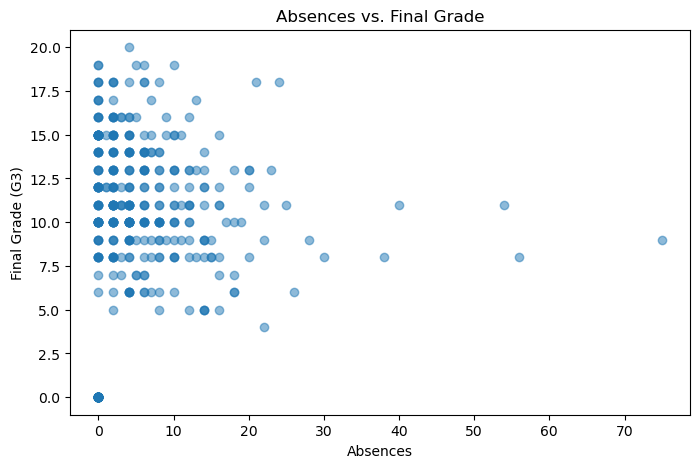

In [10]:
# Q4: Absences distribution and impact on G3
plt.figure(figsize=(8, 5))
plt.scatter(df['absences'], df['G3'], alpha=0.5)
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.title('Absences vs. Final Grade')
plt.show()

In [11]:
print("Absences Summary:")
print(df['absences'].describe())

Absences Summary:
count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


Insight: High absences (>20) correlate with lower grades, but some students buck the trend. We also see another hint of dropouts or missing inputs there given the students who has 0 absence appear to have 0 final grade.

### Setting Up for Association Analysis: Attribute Selection
The EDA explored a subset of attributes (`sex`, `school`, `studytime`, `absences`, `G3`) to understand basic patterns. For association analysis, we’ll expand to include more attributes from the 33 available, such as:
- **Categorical**: `address` (urban/rural), `activities` (yes/no), `higher` (wants higher education).
- **Ordinal**: `Medu` (mother’s education), `freetime`, `studytime`.
- **Continuous (to discretize)**: `absences`, `G3` (final grade).

This broader set will help us uncover richer rules, like `{urban, high_study_time} -> {high_grade}`. Continuous variables (`absences`, `G3`) will be discretized into bins for compatibility with association rule mining.

Now lets select those attributes and make a new subset of the dataframe:

In [37]:
# Select attributes based on selection
selected_cols = ['school', 'sex', 'address', 'studytime', 'activities', 'higher', 'Medu', 
                 'freetime', 'absences', 'G3']
df_subset = df[selected_cols].copy()

In [38]:
df_subset.head()

,school,sex,address,studytime,activities,higher,Medu,freetime,absences,G3
0,GP,F,U,2,no,yes,4,3,6,6
1,GP,F,U,2,no,yes,1,3,4,6
2,GP,F,U,2,no,yes,1,3,10,10
3,GP,F,U,3,yes,yes,4,2,2,15
4,GP,F,U,2,no,yes,3,3,4,10


Association analysis traditionally works with categorical data, but many datasets include continuous variables (e.g., `absences` or `G3`). One of the method to handle continues attributes is Discretization-Based, where we convert these into discrete bins to enable rule mining. As the book mentioned, association rules that incorporate continous attributes are commonly known as "Quantitative Association Rules".  Discretization-based method is the most common approach for handling this type of data. The way this method handle it is by grouping the adjacent values of the attribute into a **finite number of intervals**.

In [39]:
# Discretize absences (0-75) into 3 bins: low, medium, high
abs_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_subset['absences_bin'] = abs_discretizer.fit_transform(df_subset[['absences']]).astype(int)
print("Absences bin edges:", abs_discretizer.bin_edges_[0])

Absences bin edges: [ 0.  2.  6. 75.]


In [40]:
# Discretize G3 (0-20) into 3 bins: low, medium, high
grade_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_subset['G3_bin'] = grade_discretizer.fit_transform(df_subset[['G3']]).astype(int)
print("G3 bin edges:", grade_discretizer.bin_edges_[0])

G3 bin edges: [ 0. 10. 12. 20.]


On the cells above, we discretize the absences into some discrete bins [a, b) where [a, b) represents an interval that includes $a$ but not $b$. We can see that "absences" is divided to bin_0[0, 2) -> low, bin_1[2, 6) -> medium, bin_2[6, 75) -> high. You might be asking why the cutoff or the interval is not equal.

The **quantile** method, used here, divides the data into bins such that each bin contains approximately the same number of observations, based on the data’s distribution. For example, `absences` (0–75) and `G3` (0–20) are split into three bins, ensuring balanced representation across students. This approach preserves the relative ordering and handles skewness (e.g., many zero absences), though it may lose fine-grained detail.

We are also going to drop the original continuous columns since the new discrete columns act as the replacement for further analysis.

In [41]:
# Drop original continuous columns
df_subset = df_subset.drop(['absences', 'G3'], axis=1)
print(df_subset.head())

  school sex address  studytime activities higher  Medu  freetime  \
0     GP   F       U          2         no    yes     4         3   
1     GP   F       U          2         no    yes     1         3   
2     GP   F       U          2         no    yes     1         3   
3     GP   F       U          3        yes    yes     4         2   
4     GP   F       U          2         no    yes     3         3   

   absences_bin  G3_bin  
0             2       0  
1             1       0  
2             2       1  
3             1       2  
4             1       1  


Categorical attributes, such as `activities` (yes/no) or `higher` (yes/no), need to be transformed for association analysis. One approach is to split binary variables into explicit binary indicators—e.g., `activities` can become `activities_yes` and `activities_no`. This ensures the absence of a category is explicitly represented, potentially improving rule interpretability (e.g., `{activities_yes} -> {G3_bin_2}`). One-hot encoding will create binary columns for each category, treating them as independent items.

Lets try to do just that:

In [ ]:
# Create a new dataframe and use a one hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['school', 'sex', 'address', 'studytime', 'activities', 'higher', 
                                               'Medu', 'freetime', 'absences_bin', 'G3_bin'])

In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   school_GP       395 non-null    bool 
 1   school_MS       395 non-null    bool 
 2   sex_F           395 non-null    bool 
 3   sex_M           395 non-null    bool 
 4   address_R       395 non-null    bool 
 5   address_U       395 non-null    bool 
 6   studytime_1     395 non-null    bool 
 7   studytime_2     395 non-null    bool 
 8   studytime_3     395 non-null    bool 
 9   studytime_4     395 non-null    bool 
 10  activities_no   395 non-null    bool 
 11  activities_yes  395 non-null    bool 
 12  higher_no       395 non-null    bool 
 13  higher_yes      395 non-null    bool 
 14  Medu_0          395 non-null    bool 
 15  Medu_1          395 non-null    bool 
 16  Medu_2          395 non-null    bool 
 17  Medu_3          395 non-null    bool 
 18  Medu_4          395 non-null  

In [48]:
df_encoded.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,studytime_1,studytime_2,studytime_3,studytime_4,...,freetime_2,freetime_3,freetime_4,freetime_5,absences_bin_0,absences_bin_1,absences_bin_2,G3_bin_0,G3_bin_1,G3_bin_2
0,True,False,True,False,False,True,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,True,False,True,False,False,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,True,False,True,False,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,True,False,False,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
4,True,False,True,False,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


As you can see, this might strike a flashback to when we work on the Market Basket Analysis dataset. The students dataset is now processed and able to be encoded to a one hot dataframe just like when we prepare the market basket dataset for association analysis when using the mlxtend library.

Association rule mining identifies relationships between variables in a dataset, expressed as rules like `{antecedent} -> {consequent}`. The **Apriori algorithm** efficiently finds frequent itemsets (combinations of variables) by leveraging the property that all subsets of a frequent itemset must also be frequent. Key metrics include:
- **Support**: The proportion of records containing an itemset (e.g., 0.1 means 10% of students).
- **Confidence**: The likelihood of the consequent given the antecedent (e.g., 0.7 means 70% chance).
- **Lift**: The ratio of observed to expected support, indicating rule strength (lift > 1 suggests a positive association).
For our student data, we’ll use these metrics to uncover patterns linking study habits and demographics to grade outcomes.

There are parameters that we should work on in the mlxtend library (apriori function). Here are the parameters and the differences with the apyori library:

1. Input: A pandas DataFrame with binary values (0/1) or booleans, where each column represents an item, and each row is a transaction. This differs from apyori’s list-of-lists format—we’ve already prepared df_encoded this way.
1. min_support: Same concept—fraction of rows where an itemset appears (e.g., 0.1 = 10% of 395 students = ~40). Required.
1. use_colnames: Boolean to use column names instead of numeric indices in output (set to True in our code for readability).
1. max_length: Maximum number of items in an itemset (optional, defaults to None, meaning no limit).
1. verbose: Controls output verbosity (optional, defaults to 0).

Missing from mlxtend:
1. min_confidence, min_lift, and min_length are not parameters of the apriori function in mlxtend. Instead:
1. min_confidence and min_lift are handled in the subsequent association_rules function, where you filter rules after generating itemsets.
1. min_length isn’t explicitly set but can be controlled by filtering frequent_itemsets based on the itemsets column length after running Apriori.

Now we can generate the frequent itemsets and association rules. Lets start filtering the itemsets appearing in at least 10% of students (~40/395), which is reasonable for 395 rows to avoid noise.

In [36]:
# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules, num_itemsets set to 30 according to the number of unique items we have on the df_encoded (or the number of columns in this case)
rules = association_rules(frequent_itemsets, num_itemsets=30, metric="confidence", min_threshold=0.6)
rules = rules.sort_values('lift', ascending=False)

# Display top rules
print("Top Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top Association Rules:
                                            antecedents  \
1285                           (studytime_1, school_GP)   
1284                           (address_U, studytime_1)   
1678               (address_U, studytime_1, higher_yes)   
496                            (address_U, studytime_1)   
54                                        (studytime_1)   
1415                         (G3_bin_2, activities_yes)   
390                            (studytime_1, school_GP)   
1282                (address_U, studytime_1, school_GP)   
176                        (studytime_1, activities_no)   
1876  (school_GP, studytime_2, higher_yes, activitie...   

                         consequents   support  confidence      lift  
1285              (sex_M, address_U)  0.136709    0.606742  1.675964  
1284              (sex_M, school_GP)  0.136709    0.692308  1.647359  
1678              (sex_M, school_GP)  0.113924    0.661765  1.574681  
496                          (sex_M)  0.146

What conclusion can be drawn from here?

Examples:
- {studytime_1, school_GP} → {sex_M, address_U}: Support 0.1367 (54 students), Confidence 0.6067 (60.67%), Lift 1.676 (strong positive association).
- {address_U, studytime_1} → {sex_M, school_GP}: Support 0.1367, Confidence 0.6923, Lift 1.647.
- {studytime_1} → {sex_M}: Support 0.1975, Confidence 0.7429, Lift 1.569.

Insights:
- studytime_1 (<2h) and school_GP often pair with sex_M (male), especially in urban areas (address_U).
- High confidence (e.g., 0.74) and lift (>1.5) suggest meaningful patterns, though support is modest (10–20%).
- G3_bin_2 (grades 12–20) with activities_yes hints at a grade-activity link.

Other than that, since our goal is to see the factors that result in low or high performance/grade, we should try to find the rules that are having the "G3" bins as a consequent. For example, rules like `{studytime_3, absences_bin_0} -> {G3_bin_2}` would tell educators that 5–10h of study with low absences predicts high grades (12–20), which is actionable.

Other things to consider:

The min_support=0.1 (40 students) and min_confidence=0.6 might filter out rules with G3_bin as consequent if those combinations are less frequent. For example, only ~132 students are in G3_bin_2, and subsets with high support/confidence might be rare.

Lets adjust our code to only select rules with the G3 bins as the consequent and lower the support threshold to capture more students:

In [70]:
# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=30, metric="confidence", min_threshold=0.6)
rules = rules.sort_values('lift', ascending=False)

# Filter rules with G3_bin in consequents
g3_rules = rules[rules['consequents'].apply(lambda x: any(g3 in x for g3 in ['G3_bin_0', 'G3_bin_1', 'G3_bin_2']))]

# Display top rules with G3 as consequent
print("Top Association Rules with G3_bin as Consequent:")
print(g3_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top Association Rules with G3_bin as Consequent:
                                          antecedents  \
7026              (Medu_4, absences_bin_1, school_GP)   
4933              (Medu_4, absences_bin_1, school_GP)   
7023  (Medu_4, absences_bin_1, school_GP, higher_yes)   
5818                         (Medu_4, absences_bin_1)   
2999                         (Medu_4, absences_bin_1)   
5817             (Medu_4, absences_bin_1, higher_yes)   
7024              (address_U, absences_bin_1, Medu_4)   
5167              (Medu_4, absences_bin_1, school_GP)   
5815              (address_U, absences_bin_1, Medu_4)   
4931              (address_U, absences_bin_1, Medu_4)   

                            consequents   support  confidence      lift  
7026  (address_U, higher_yes, G3_bin_2)  0.063291    0.675676  2.021908  
4933              (address_U, G3_bin_2)  0.063291    0.675676  1.991731  
7023              (address_U, G3_bin_2)  0.063291    0.675676  1.991731  
5818  (address_U, higher_ye

In [71]:
g3_rules.shape

(41, 14)

Now this looks more interesting for us. For example, `{Medu_4, absences_bin_1, school_GP} -> {address_U, higher_yes, G3_bin_2}` suggests that students with highly educated mothers, 2–6 absences, and attending GP school are likely to live in urban areas, aspire to higher education, and achieve high grades (12–20). The lift of 2.02 is impressive, indicating a strong link. Rules consistently tie parental education (Medu_4) and moderate absences (absences_bin_1) to high grades, with urban settings and ambition (higher_yes) as bonuses.

You can try filtering it further by increasing the lift threshold to highlight the strongest rules. Since the rules captured are only showing the higher performance as the consequent (G3_bin_2), we should also proceed to adjust the rules to choose **only** "G3_bins_0" as the consequent and lower the support & confidence threshold to see the factors that result in lower performance. 

In [72]:
# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.045, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=30, metric="confidence", min_threshold=0.5)
rules = rules.sort_values('lift', ascending=False)

# Filter rules with G3_bin in consequents
g3_bin0_rules = rules[rules['consequents'].apply(lambda x: any(g3 in x for g3 in ['G3_bin_0']))]

# Display top rules with G3 as consequent
print("Top Association Rules with G3_bin_0 as Consequent:")
print(g3_bin0_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top Association Rules with G3_bin_0 as Consequent:
                                             antecedents  \
12622                (absences_bin_0, sex_F, freetime_3)   
12616    (absences_bin_0, sex_F, freetime_3, higher_yes)   
9170                 (absences_bin_0, sex_F, freetime_3)   
12611     (absences_bin_0, address_U, freetime_3, sex_F)   
6196      (school_GP, sex_F, absences_bin_0, freetime_3)   
9289                 (absences_bin_0, sex_F, freetime_3)   
9164      (absences_bin_0, address_U, freetime_3, sex_F)   
12605  (address_U, freetime_3, higher_yes, sex_F, abs...   
6199                 (absences_bin_0, sex_F, freetime_3)   
10728              (school_GP, address_U, sex_F, Medu_3)   

                             consequents   support  confidence      lift  
12622  (G3_bin_0, address_U, higher_yes)  0.048101    0.527778  2.369003  
12616              (G3_bin_0, address_U)  0.048101    0.542857  2.210604  
9170               (G3_bin_0, address_U)  0.048101    0.527778 

In [73]:
g3_bin0_rules.shape

(27, 14)

We captured some patterns here by working out on those parameters and here are some insights that we can conclude:

- Low Grades Linked to Low Absences: The dominance of absences_bin_0 with G3_bin_0 supports our dropout hypothesis. Students with 0–2 absences but grade 0 might be those who stopped engaging, especially with the zero-grade spike noted earlier.
- Female Urban Students: sex_F and address_U suggest urban females are overrepresented in low grades, possibly due to social or academic pressures.
- Moderate Free Time: freetime_3 implies a balanced lifestyle doesn’t prevent low performance—perhaps study time or support is lacking.
- Aspiration Paradox: higher_yes with low grades indicates ambition doesn’t guarantee success, possibly pointing to unmet needs (e.g., resources).
- Parental Education: Medu_4 (high maternal education) with low grades is surprising—might reflect high expectations not met.

We can give some actionable takeaways for the educators by finding out this patterns such as:

- Intervention: Target urban female students with 0–2 absences for engagement checks, as they may be at risk of dropping out.
- Support: Enhance support for students with educated parents, ensuring ambition translates to performance.
- Further Study: Investigate why absences_bin_0 correlates with G3_bin_0—is it dropout, incomplete data, or another factor?

### Visualization

Lets visualize these patterns in a plot so we can see better representation of them:

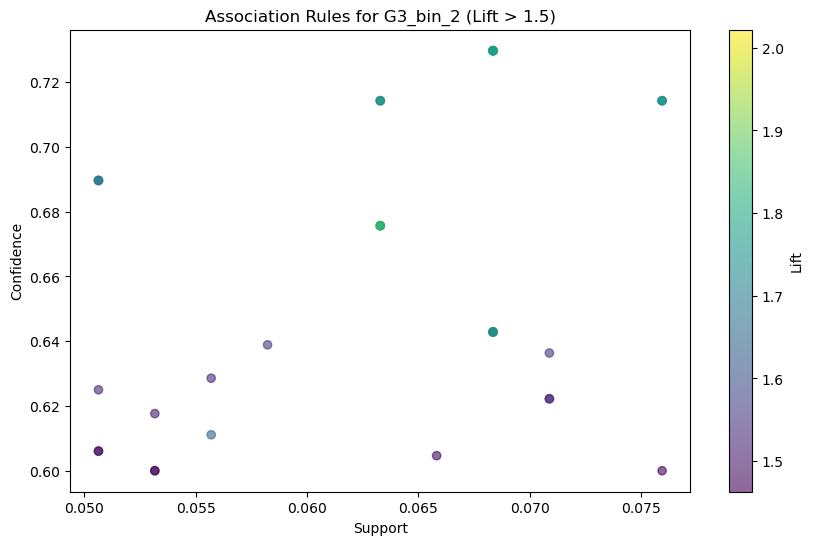

In [ ]:
# Visualization of high performance factors
plt.figure(figsize=(10, 6))
plt.scatter(g3_rules['support'], g3_rules['confidence'], c=g3_rules['lift'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules for G3_bin_2 (Lift > 1.5) -> High grade bins ()')
plt.show()

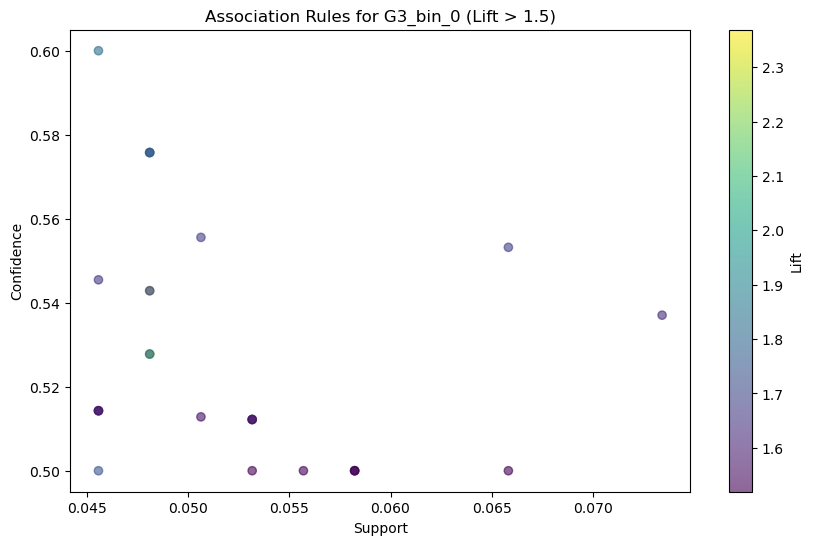

In [75]:
# Visualization of association rules
plt.figure(figsize=(10, 6))
plt.scatter(g3_bin0_rules['support'], g3_bin0_rules['confidence'], c=g3_bin0_rules['lift'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules for G3_bin_0 (Lift > 1.5)')
plt.show()

Both plots show that lift increases with confidence and/or support, but G3_bin_2 rules have higher support (more students), while G3_bin_0 rules rely on rarer, stronger associations (higher lift peaks). This visualizes the balance between frequency and strength in our rules.

## Limitations

- **Small Dataset Size**: With only 395 students, the low support threshold (0.045) captures rare patterns, but results may not generalize to larger populations.
- **Discretization Loss**: Binning `absences` and `G3` into three levels (e.g., 0 to <2, 2 to <6, 6 to 75 for absences) simplifies data, potentially missing nuances (e.g., 0 vs. 1 absence).
- **Zero-Grade Spike**: The high frequency of grade 0 with 0 absences suggests possible dropouts or incomplete data, skewing `G3_bin_0` rules and limiting interpretation.
- **Limited Attributes**: The analysis used a subset of 10 attributes, excluding others (e.g., `failures`, `age`) that might influence grades.
- **Confidence Bias**: The 0.5 confidence threshold may exclude weaker but valid associations, especially for `G3_bin_0`.

## Conclusions

- **High-Grade Patterns**: Rules like `{Medu_4, absences_bin_1, school_GP} → {address_U, higher_yes, G3_bin_2}` (lift 2.02) indicate that students with highly educated mothers, moderate absences (2–6), and GP school attendance, especially in urban areas with higher education aspirations, are likely to achieve high grades (12–20).
- **Low-Grade Patterns**: Rules such as `{absences_bin_0, sex_F, freetime_3} → {G3_bin_0, address_U, higher_yes}` (lift 2.37) suggest that female urban students with 0–1 absences and moderate free time, despite higher education goals, tend to score low (0–10), possibly due to dropout or disengagement.
- **Actionable Insights**: Educators should monitor urban female students with low absences for engagement, while leveraging parental education and attendance to boost high performance.
- **Next Steps**: Visualization confirmed that higher lift correlates with higher confidence/support, aiding rule interpretation.

## Further Exercises: Your Turn!
This analysis used a curated set of attributes for association rules. The dataset contains 33 attributes in total, including `Fjob`, `reason`, `famrel`, and `Dalc` (workday alcohol consumption). We encourage you to explore these additional variables, potentially integrating them into the association analysis to uncover new patterns or validate existing rules. Additionally, you should also explore other methods of handling continuous attributes such as statistics-based method or non-discretization method (where you are interested more in analyzing the non-discrete data such as words association).